In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")


In [5]:
train = pd.read_csv('data/train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [4]:
test = pd.read_csv('data/test.csv', parse_dates=['datetime'])
test.shape

(6493, 9)

In [6]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [7]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 16)

<AxesSubplot:title={'center':'test windspeed'}, xlabel='windspeed', ylabel='count'>

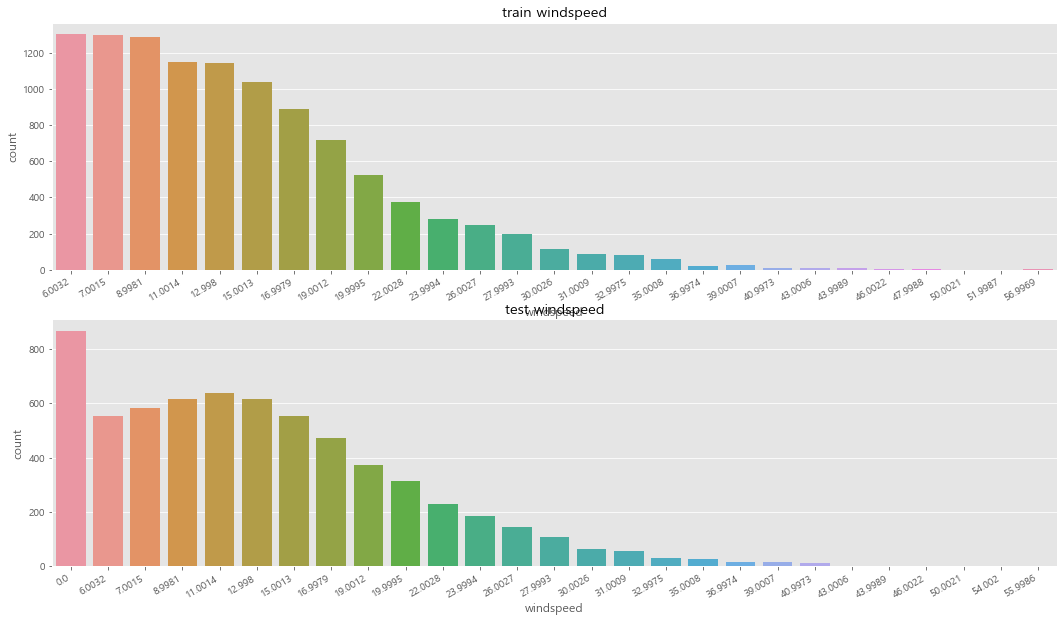

In [27]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count', title='train windspeed')
sns.countplot(data=train, x='windspeed', ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count', title='test windspeed')
sns.countplot(data=test, x='windspeed', ax=axes[1])

In [17]:
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print(trainWind0)
print(trainWindNot0)

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10826 2012-12-17 12:00:00       4        0           1        2  16.40   
10829 2012-12-17 15:00:00       4        0           1        2  17.22   
10846 2012-12-18 08:00:00       4        0           1        1  15.58   
10860 2012-12-18 22:00:00       4        0           1        1  13.94   
10862 2012-12-19 00:00:00       4        0           1        1  12.30   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81        0.

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
def predict_windspeed(data):
    dataWind0 = train.loc[train['windspeed'] == 0]
    dataWindNot0 = train.loc[train['windspeed'] != 0]

    wCol = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']

    dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')

    rfModel_wind = RandomForestClassifier()

    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0['windspeed'])

    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])

    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0

    predictWind0['windspeed'] = wind0Values

    data = predictWindNot0.append(predictWind0)

    data['windspeed'] = data['windspeed'].astype('float')

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)

    return data

<AxesSubplot:title={'center':'train windspeed'}, xlabel='windspeed', ylabel='count'>

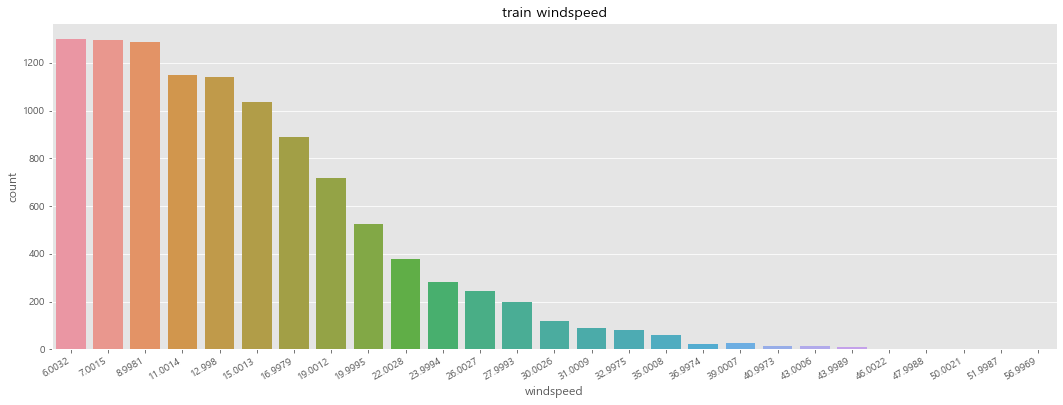

In [26]:
train = predict_windspeed(train)

fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count', title='train windspeed')
sns.countplot(data=train, x='windspeed', ax=ax1)

In [28]:
# 연속형 feature와 범주형 feature 
# 연속형 feature = ["temp","humidity","windspeed","atemp"]
# 범주형 feature의 type을 category로 변경 해 준다.
categorical_feature_names = ["season","holiday","workingday","weather",
                             "dayofweek","month","year","hour"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [29]:
feature_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [30]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [31]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [32]:
label_name = 'count'

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [45]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer


make_scorer(rmsle)

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [38]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)

model
# n_jobs=-1 은 컴퓨터의 모든 코드를 사용한다.

RandomForestRegressor(n_jobs=-1, random_state=0)

In [43]:
from sklearn.model_selection import cross_val_score

In [47]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
print('Score = {0:.5f}'.format(score))



Wall time: 13.2 s
Score = 0.33067


In [48]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [50]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(6493,)


array([ 12.41,   5.09,   4.17,   3.47,   3.23,   6.39,  38.  , 105.65,
       235.01, 136.94])

In [53]:
submission = pd.read_csv('data/sampleSubmission.csv')
submission

submission['count'] = predictions
submission

,datetime,count
0,2011-01-20 00:00:00,12.4100
1,2011-01-20 01:00:00,5.0900
2,2011-01-20 02:00:00,4.1700
3,2011-01-20 03:00:00,3.4700
4,2011-01-20 04:00:00,3.2300
...,...,...
6488,2012-12-31 19:00:00,196.4700
6489,2012-12-31 20:00:00,152.9900
6490,2012-12-31 21:00:00,106.4000
6491,2012-12-31 22:00:00,101.2025


In [54]:
submission.to_csv('data/Score_{0:.5f}_submission.csv'.format(score), index=False)